In [74]:
import numpy as np
import pandas as pd
import networkx as nx

In [75]:
!pip install node2vec

In [76]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [77]:
df = pd.read_csv("/content/drive/MyDrive/preprocessed.csv")
df.head()

,DATE,DURATION,PROTOCOL,SRC_IP_ADDR,SRC_PORT,DST_IP_ADDR,DST_PORT,PACKETS,BYTES,TOS,ATTACK_TYPE,TYPE,FLAG_A,FLAG_P,FLAG_R,FLAG_S,FLAG_F,FLAG_0xdb,FLAG_0xc2,FLAG_0xd7,FLAG_0xd6,FLAG_0xdf,FLAG_0xda,FLAG_0x52,FLAG_0xd3,FLAG_0x5b,FLAG_0x5a,FLAG_0xd2,FLAG_0xde,FLAG_0x53,FLAG_0xc6
0,2017-03-14 17:43:26.135,81504.787,3,43440,8,44022,8,8639,9318.4,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2017-03-14 17:43:26.135,81504.787,3,43441,8,44021,8,12024,10547.2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2017-03-14 17:43:26.135,81504.787,3,43441,8,44021,8,12024,10547.2,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2017-03-14 17:43:26.135,81504.787,3,43440,8,44022,8,8639,9318.4,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2017-03-14 17:43:39.011,183418.493,3,43441,8,44021,8,20751,5939.2,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
data = df.sample(100)
columns = data.columns
columns

Index(['DATE', 'DURATION', 'PROTOCOL', 'SRC_IP_ADDR', 'SRC_PORT',
       'DST_IP_ADDR', 'DST_PORT', 'PACKETS', 'BYTES', 'TOS', 'ATTACK_TYPE',
       'TYPE', 'FLAG_A', 'FLAG_P', 'FLAG_R', 'FLAG_S', 'FLAG_F', 'FLAG_0xdb',
       'FLAG_0xc2', 'FLAG_0xd7', 'FLAG_0xd6', 'FLAG_0xdf', 'FLAG_0xda',
       'FLAG_0x52', 'FLAG_0xd3', 'FLAG_0x5b', 'FLAG_0x5a', 'FLAG_0xd2',
       'FLAG_0xde', 'FLAG_0x53', 'FLAG_0xc6'],
      dtype='object')

In [81]:
data[data['ATTACK_TYPE'] == "benign"]

,DATE,DURATION,PROTOCOL,SRC_IP_ADDR,SRC_PORT,DST_IP_ADDR,DST_PORT,PACKETS,BYTES,TOS,ATTACK_TYPE,TYPE,FLAG_A,FLAG_P,FLAG_R,FLAG_S,FLAG_F,FLAG_0xdb,FLAG_0xc2,FLAG_0xd7,FLAG_0xd6,FLAG_0xdf,FLAG_0xda,FLAG_0x52,FLAG_0xd3,FLAG_0x5b,FLAG_0x5a,FLAG_0xd2,FLAG_0xde,FLAG_0x53,FLAG_0xc6


In [82]:
G = nx.DiGraph()

In [112]:
all_graphs = []
for col in columns:
  if col == "SRC_IP_ADDR" or col == "DST_IP_ADDR":
      pass
  G = nx.DiGraph()
  for i, row in data.iterrows():
      G.add_edge(row["SRC_IP_ADDR"], row["DST_IP_ADDR"], weight=row[col])
  all_graphs.append(G)
print(len(all_graphs))

31


{(11, 21982): Text(0.20286173830170137, -0.7109139171789427, "{'weight': 1}"),
 (33, 21910): Text(0.8149878811523786, -0.11173700052389038, "{'weight': 2}"),
 (86, 44021): Text(0.7142470971322532, 0.47798232221655934, "{'weight': 17}"),
 (95, 21982): Text(0.21323555153277396, -0.7316230733613203, "{'weight': 1}"),
 (183, 21991): Text(-0.621353022647385, -0.5532903144712313, "{'weight': 1}"),
 (507,
  21981): Text(-0.42628756816155977, -0.7455296626989381, "{'weight': 1}"),
 (562, 21980): Text(-0.3481692360057146, -0.3148077780228394, "{'weight': 1}"),
 (562, 21983): Text(-0.3004519345820732, 0.5147274275760138, "{'weight': 2}"),
 (602, 21698): Text(0.4683308693382672, -0.5751231799978458, "{'weight': 1}"),
 (602, 21982): Text(0.2819119255206045, -0.6841549262667195, "{'weight': 1}"),
 (604, 21921): Text(0.07970619492699069, 0.869721132279512, "{'weight': 4}"),
 (696, 21698): Text(0.47708743645784424, -0.6233432762059112, "{'weight': 1}"),
 (696, 21982): Text(0.2906684926401815, -0.7323

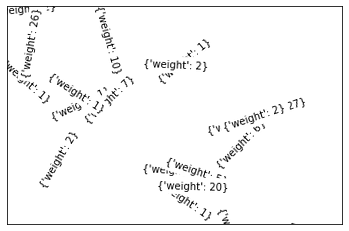

In [86]:
#nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G))
#nx.draw_networkx_edge_labels(all_graphs[7], pos=nx.spring_layout(all_graphs[7]))

In [113]:
print("number of nodes:", G.number_of_nodes())
print("number of edges:", G.number_of_edges())

number of nodes: 95
number of edges: 78


In [ ]:
import matplotlib.pyplot as plt
# we skip DATA
for graph in all_graphs[1:]:
  pos = nx.spring_layout(graph, scale=10)
  plt.figure(3,figsize=(14,14))
  nx.draw(graph, pos, with_labels=True)
  plt.show()

/usr/local/lib/python3.7/dist-packages/node2vec/node2vec.py:131: RuntimeWarning: invalid value encountered in true_divide
  d_graph[source][self.FIRST_TRAVEL_KEY] = first_travel_weights / first_travel_weights.sum()


ValueError: ignored

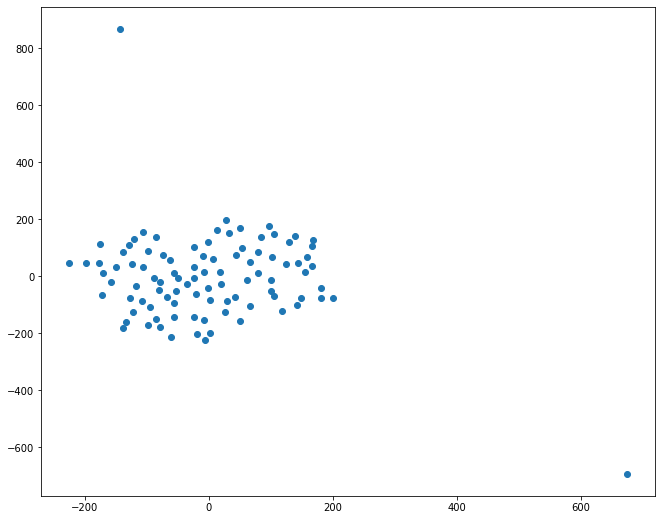

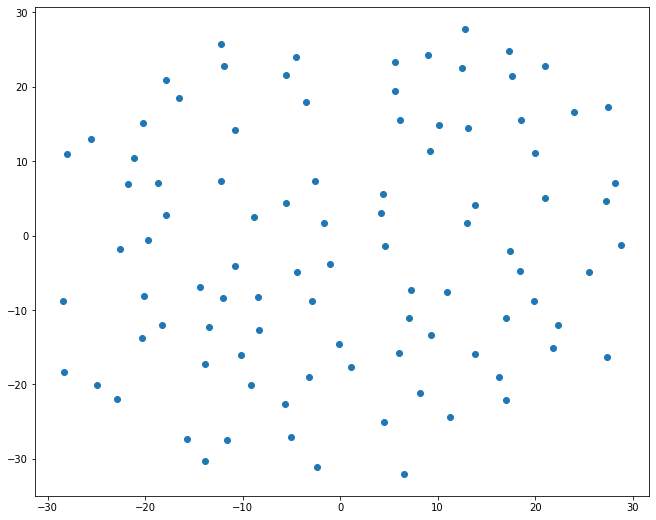

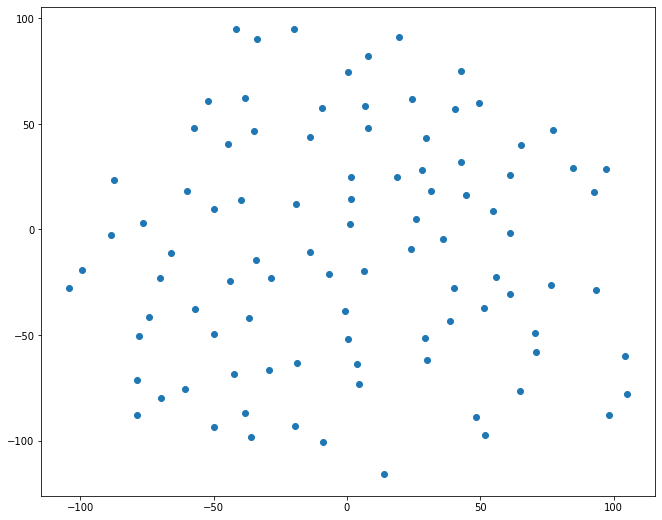

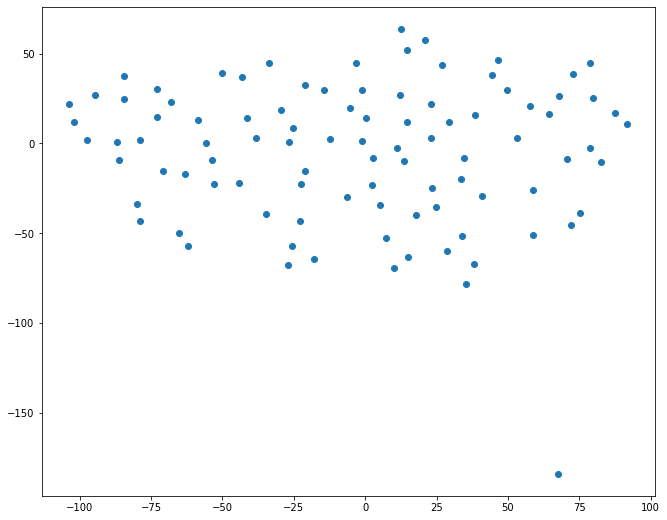

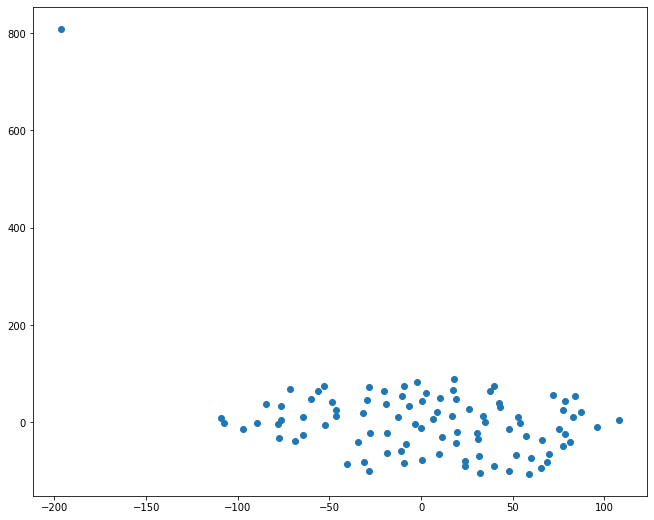

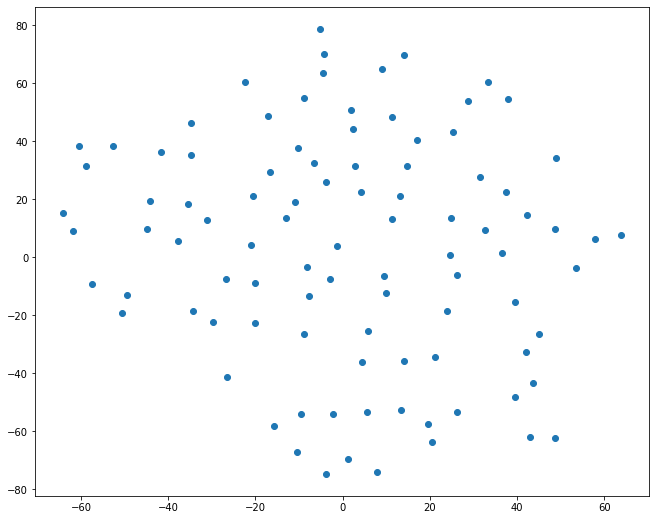

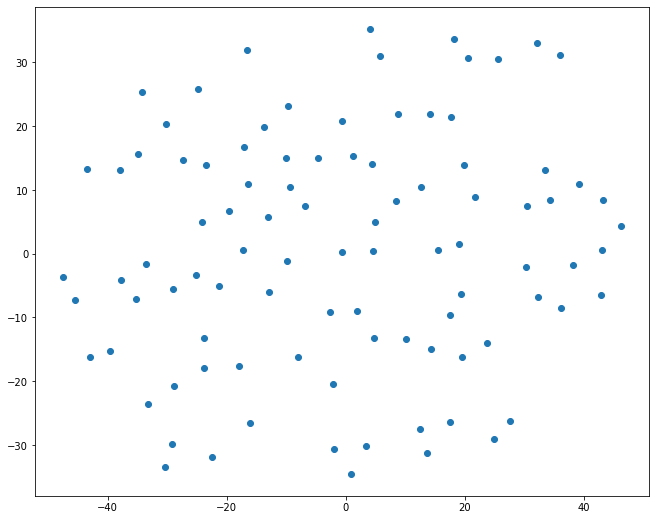

In [126]:
from node2vec import Node2Vec
from sklearn.manifold import TSNE

# for now it does not work for every features
all_embeddings = []
for graph in all_graphs[2:]:
  node2vec = Node2Vec(graph, dimensions=10, walk_length=5, num_walks=10, workers=2)
  model = node2vec.fit(window=3, min_count=1)

  # Create embedding
  model.wv.get_vector("43440")

  ip_nodes = model.wv.vocab
  embeddings = np.array([model.wv[x] for x in ip_nodes])
  #print(embeddings)
  all_embeddings.append(embeddings)

  # reduce dimensions to visualize the embedding
  tsne = TSNE(n_components=2, random_state=7, perplexity=15)
  embeddings_2d = tsne.fit_transform(embeddings)

  figure = plt.figure(figsize=(11, 9))
  ax = figure.add_subplot(111)
  ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

print(len(all_embeddings))

In [100]:
#for node, _ in model.wv.most_similar('dos'):
#    if len(node) > 3:
#        print(node)